In [2]:
import pandas as pd
import numpy as np

We have imported the required libraries, and now declare the years whose data we will be using.

In [3]:
years = [i for i in range(2010, 2019)]

Now, we have to work with the year dataframes in chunks due to their large sizes. <br>
We also convert dates from string to datetime datatype, while making sure to only use the valid dates. <br>
Finally, we create a new column that stores the time a particular case took to complete.

In [5]:
%%time

stats = {}
for year in years:
    stats[year] = [0,0] # time_taken, total number of cases
    
start_date = '2009-12-31'
end_date = '2023-01-01'

for year in years:
    
    print(f"\n{year}")
    file_name = f"/kaggle/input/precogdata/csv/cases/cases/cases_{year}.csv"
    
    df_year = pd.read_csv(file_name, low_memory=True, chunksize=100_000, iterator=True)

    for sub_year in df_year:
        
        # keeping only relevant columns
        sub_year = sub_year[['date_of_filing', 'date_of_decision']]

        
        # changing datatype for convenience
        sub_year['date_of_decision'] = pd.to_datetime(sub_year['date_of_decision'], errors='coerce')
        sub_year['date_of_filing'] = pd.to_datetime(sub_year['date_of_filing'], errors='coerce')
        
        sub_year = sub_year[sub_year['date_of_filing'].notna()].reset_index()
        sub_year = sub_year[sub_year['date_of_decision'].notna()].reset_index()
        
        
        # applying a filter to remove illogical/incorrect date data
        filt1 = (sub_year['date_of_filing'] > start_date) & (sub_year['date_of_filing'] < end_date)
        sub_year = sub_year.loc[filt1]
        
        filt2 = (sub_year['date_of_decision'] > start_date) & (sub_year['date_of_decision'] < end_date)
        sub_year = sub_year.loc[filt2]

        
        # adding a new column for the time taken for a case to finish
        sub_year['time_taken_to_finish_case'] = sub_year['date_of_decision'] - sub_year['date_of_filing']
        sub_year['time_taken_to_finish_case'] = sub_year['time_taken_to_finish_case'].dt.days + 1    # +1 because if it finished on the same day, counted as 1 day

        
        # adding the values to the main counter variables
        stats[year][0] += sub_year['time_taken_to_finish_case'].sum()
        stats[year][1] += sub_year.shape[0]
    
    
        # progress bar
        print('.', end='')


2010
...........................................
2011
.....................................................
2012
.................................................................
2013
............................................................................
2014
.........................................................................................
2015
.........................................................................................................
2016
..................................................................................................................
2017
...................................................................................................................................
2018
..........................................................................................................................................CPU times: user 5min 40s, sys: 26.6 s, total: 6min 7s
Wall time: 8min 26s


Thus, we get the total amount of days every case in a year took, and the number of cases in that year.

In [6]:
stats

{2010: [4027276022, 3708258],
 2011: [4157493268, 4528122],
 2012: [4181683279, 5510405],
 2013: [3699182130, 6325197],
 2014: [3254980823, 7274065],
 2015: [2945670760, 8227218],
 2016: [2029175630, 8089773],
 2017: [1311116119, 8543373],
 2018: [579122081, 7396096]}

We calculate the average time of completion of a case for each year use this information.

In [7]:
res = {}
    
for i in stats:
    res[i] = (stats[i][0] / stats[i][1]).round(2)

Printing the result.

In [8]:
res

{2010: 1086.03,
 2011: 918.15,
 2012: 758.87,
 2013: 584.83,
 2014: 447.48,
 2015: 358.04,
 2016: 250.83,
 2017: 153.47,
 2018: 78.3}

Importing libraries for plotting the graph.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

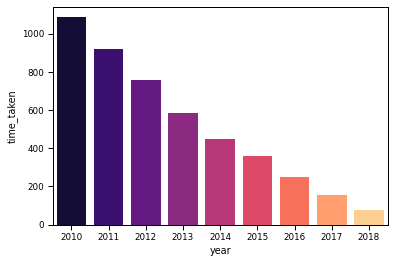

In [28]:
sns.set_context('paper')

details = {
    'year' : res.keys(),
    'time_taken' : res.values()
}
 
# create plot
sns.barplot(x = 'year', y = 'time_taken', data = df,
            palette = 'magma',            
            saturation = 8
            )

plt.show()

#### Here we see that the average time taken for a case to finish (in days) consistently reduced over the years.